In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
n_data = torch.ones(50, 2) # 数据的基本形态
x1 = torch.normal(2 * n_data, 1) # shape=(50, 2)
y1 = torch.zeros(50) # 类型0 shape=(50, 1)
x2 = torch.normal(-2 * n_data, 1) # shape=(50, 2)
y2 = torch.ones(50) # 类型1 shape=(50, 1)

In [3]:
x = torch.cat((x1, x2), 0).type(torch.FloatTensor)
y = torch.cat((y1, y2), 0).type(torch.FloatTensor)
print(x.size())
print(y.size())
y = y.view(-1,1)
print(y.size())

torch.Size([100, 2])
torch.Size([100])
torch.Size([100, 1])


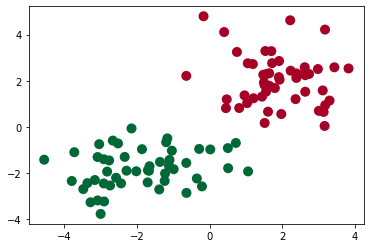

In [4]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1],
c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) 
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0, j)

In [6]:
w = torch.tensor(np.random.normal(0, 0.01,(2, 1)), dtype=torch.float32)

In [7]:
w.requires_grad_(requires_grad=True)

tensor([[ 0.0019],
        [-0.0049]], requires_grad=True)

In [8]:
def Sigmoid(X,w):
    return 1/(1+torch.exp(-1*torch.mm(X,w)))

In [9]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

In [10]:
import torch.nn as nn
loss = nn.BCELoss()

In [11]:
lr = 0.03
num_epochs = 40
batch_size = 10
net = Sigmoid

In [12]:
loss_list = []
epoch_list = []
for epoch in range(num_epochs):  
    for X, Y in data_iter(batch_size, x, y):
        l = loss(net(X, w), Y) 
        l.backward()  
        sgd([w], lr, batch_size)  
        w.grad.data.zero_()   
    train_l = loss(net(x, w), y)
    epoch_list.append(epoch)
    loss_list.append(train_l.mean().item())
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))#第一次训练后全部训练集的损失的均值  

epoch 1, loss 0.639763
epoch 2, loss 0.595213
epoch 3, loss 0.555851
epoch 4, loss 0.520948
epoch 5, loss 0.489894
epoch 6, loss 0.462216
epoch 7, loss 0.437455
epoch 8, loss 0.415215
epoch 9, loss 0.395129
epoch 10, loss 0.376959
epoch 11, loss 0.360458
epoch 12, loss 0.345415
epoch 13, loss 0.331643
epoch 14, loss 0.319022
epoch 15, loss 0.307404
epoch 16, loss 0.296696
epoch 17, loss 0.286778
epoch 18, loss 0.277569
epoch 19, loss 0.269003
epoch 20, loss 0.261025
epoch 21, loss 0.253565
epoch 22, loss 0.246579
epoch 23, loss 0.240019
epoch 24, loss 0.233854
epoch 25, loss 0.228046
epoch 26, loss 0.222568
epoch 27, loss 0.217389
epoch 28, loss 0.212490
epoch 29, loss 0.207846
epoch 30, loss 0.203436
epoch 31, loss 0.199245
epoch 32, loss 0.195254
epoch 33, loss 0.191452
epoch 34, loss 0.187824
epoch 35, loss 0.184358
epoch 36, loss 0.181044
epoch 37, loss 0.177872
epoch 38, loss 0.174831
epoch 39, loss 0.171917
epoch 40, loss 0.169118


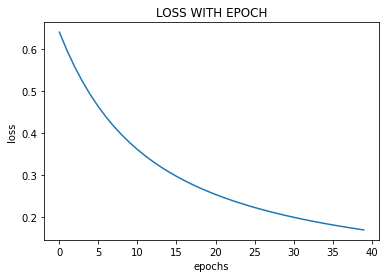

In [13]:
import matplotlib.pyplot as plt
plt.plot(epoch_list,loss_list)
plt.title("LOSS WITH EPOCH")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [14]:
print(w)

tensor([[-0.4907],
        [-0.5308]], requires_grad=True)


In [15]:
def accuracy(y_hat, y):
    return (y_hat.argmax(dim=1) == y).float().mean().item()

In [16]:
n=0
sum_accuracy = 0
for X, Y in data_iter(batch_size, x, y):
    sum_accuracy +=  accuracy(net(X,w),y)
    n+=1
average_accuracy = sum_accuracy/n
average_accuracy

0.5